In [32]:
import requests



ot_key = ''

def get_candles(contract, since, until, duration):
    url = 'http://hist-quote.1tokentrade.cn/candles?since={}&until={}&contract={}&duration={}&format=json'.format(
        since, until, contract, duration)
    
    r = requests.get(url, headers={'ot-key': ot_key})

    if r.status_code != 200:
        print('fail get candles', r.status_code, r.text)
        return
    r = r.json()
    return r


date = '2018-11-08'
since = date
until = '2018-11-12'

contract = 'okex/btc.usdt'

get_candles(contract, since, until, duration = '1d')


[{'close': 6479.1285,
  'high': 6592.5417,
  'low': 6471.0184,
  'open': 6577.6831,
  'timestamp': 1541635200,
  'volume': 20361.01455476},
 {'close': 6418.3598,
  'high': 6640.0,
  'low': 6391.3001,
  'open': 6480.7052,
  'timestamp': 1541721600,
  'volume': 21234.81487396},
 {'close': 6430.6142,
  'high': 6475.8497,
  'low': 6414.4006,
  'open': 6418.3596,
  'timestamp': 1541808000,
  'volume': 16714.76596263},
 {'close': 6451.9522,
  'high': 6462.1633,
  'low': 6357.0,
  'open': 6430.6144,
  'timestamp': 1541894400,
  'volume': 17946.1798993}]

In [8]:
import time

time_local = time.localtime()
today = time.strftime("%Y-%m-%d",time_local)


print(today)

2019-03-14


In [13]:
date = '2018-02-01'
since = date
until = today

contract = 'okex/btc.usdt'

r_json = get_candles(contract, since, until, duration = '1d')

In [18]:
print(type(r_json))

print(len(r_json))
print(r_json[0])
print(r_json[len(r_json)-1])

<class 'list'>
406
{'open': 10289.8899, 'close': 9222.292, 'high': 10299.0, 'low': 8867.8443, 'volume': 34747.32767936, 'timestamp': 1517443200}
{'open': 3882.5, 'close': 3866.1, 'high': 3891.9, 'low': 3839.1, 'volume': 34508.38403817, 'timestamp': 1552435200}


In [26]:


for i in range(len(r_json)):
    time_local = time.localtime(r_json[i]['timestamp'])
    time_str = time.strftime("%Y-%m-%d",time_local)
    r_json[i]['time'] = time_str
    


In [27]:
import pandas as pd

candle = pd.DataFrame(r_json,columns=['time','close'])
print(candle.__len__())
print(candle.head())
print(candle.tail())




406
         time      close
0  2018-02-01  9222.2920
1  2018-02-02  8893.7700
2  2018-02-03  9092.1304
3  2018-02-04  8198.9811
4  2018-02-05  6959.4452
           time      close
401  2019-03-09  3942.2339
402  2019-03-10  3916.0110
403  2019-03-11  3870.5990
404  2019-03-12  3882.5000
405  2019-03-13  3866.1000


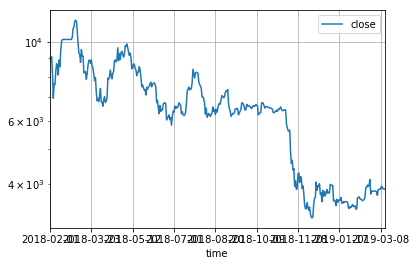

In [31]:
from matplotlib import pyplot as plt

candle.plot(x = 'time',logy = True ,grid = True)
plt.show()
